In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

In [ ]:
def sin(x, tol=1e-8, max_iter=100):
    n = 0
    suma = 0
    valores = []

    while n < max_iter:
        termino = ((-1) ** n) / (math.factorial(2 * n + 1)) * (x ** (2 * n + 1))  # Cálculo del término n-ésimo de la serie de Taylor para sin(x):
        suma += termino           # Se agrega el término a la suma acumulada
        valores.append(suma)      # Se guarda el valor actual de la suma para seguimiento
        if abs(termino / suma) < tol:  # Condición de parada: si el término relativo es menor que la tolerancia, se detiene la suma
            break
        n += 1  # Incrementa el contador para el siguiente término

    return suma, valores, n + 1  # Devuelve la aproximación, lista de sumas parciales y número de términos usados

In [ ]:
def errores(aprox, real):
  error_r = abs(real-aprox)/real
  error_p = error_r*100
  return error_r, error_p

In [ ]:
Sin_x, Valores_sin, Iteraciones = sin(math.pi/4)
Sin_x, Iteraciones
#Es una serie que tarda poco en converger

(0.7071067811796194, 6)

In [ ]:
Error_relativo, Error_porcentual = errores(Sin_x, math.sin(math.pi/4))
Error_relativo, Error_porcentual

(9.797690960678494e-12, 9.797690960678495e-10)

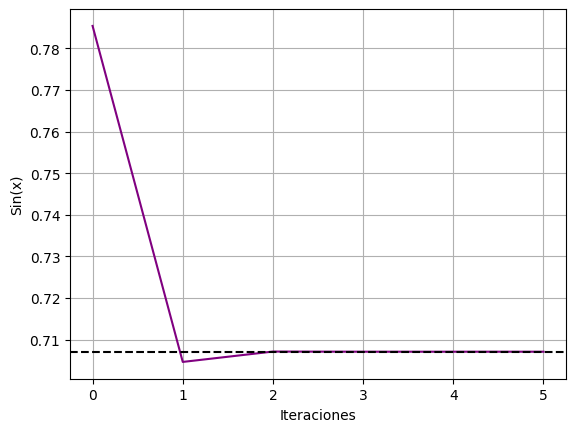

In [ ]:
sin_r=math.sin(math.pi/4)
plt.plot(Valores_sin, color = "purple")
plt.axhline(y=sin_r,color="black", ls = "--")
plt.xlabel("Iteraciones")
plt.ylabel("Sin(x)")
plt.grid()
plt.show()

In [ ]:
def ln(x, tol=1e-8, max_iter=100):
    n = 1
    suma = 0
    valores_ln = []

    while n < max_iter:
        termino = ((-1) ** (n - 1)) / n * (x ** n)  # Cálculo del término n-ésimo de la serie:
        suma += termino          # Se agrega el término a la suma acumulada
        valores_ln.append(suma)  # Se guarda el valor actual de la suma para seguimiento
        if abs(termino / suma) < tol: # Condición para detener la suma si el término relativo es menor que la tolerancia
            break
        n += 1  # Incrementa el contador para el siguiente término
    return suma, valores_ln, n + 1  # Devuelve la aproximación, lista de sumas parciales y número de términos usados

In [ ]:
Ln_x, Valores_ln, Iteraciones = ln(math.pi/4)
Ln_x, Iteraciones
#Esta serie tarda más en convergir que la anterior.

(0.5796414488832067, 63)

In [ ]:
Error_relativo, Error_porcentual = errores(Ln_x, math.log((math.pi/4)+1))
Error_relativo, Error_porcentual

(3.797023915683953e-09, 3.7970239156839535e-07)

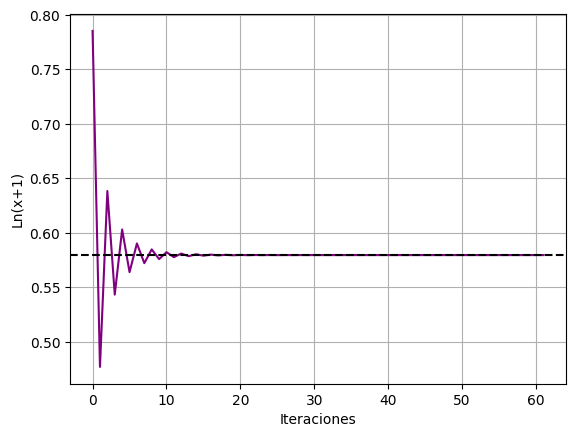

In [ ]:
ln_r=math.log(x+1)
plt.plot(Valores_ln, color = "purple")
plt.axhline(y=ln_r,color="black", ls = "--")
plt.xlabel("Iteraciones")
plt.ylabel("Ln(x+1)")
plt.grid()
plt.show()

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



In [ ]:
def coef_binomial(a, n):
    coef = 1  # Inicializa el producto en 1
    for k in range(n):
        coef *= (a - k)  # Multiplica sucesivamente por (a - k) desde k=0 hasta k=n-1
    return coef / math.factorial(n)  # Divide el producto entre n! para obtener el coeficiente binomial

In [ ]:
def raiz(x, tol=1e-8, max_iter=100):
    n = 0
    suma = 0
    valores = []

    while n < max_iter:
        termino = coef_binomial(1/2, n) * (x ** n)  # Cálculo del término n-ésimo usando el coeficiente binomial generalizado para exponente 1/2:
        suma += termino       # Se agrega el término a la suma acumulada
        valores.append(suma)  # Se guarda el valor actual de la suma para seguimiento
        if abs(termino) < tol:  # Condición para detener la suma si el término es menor que la tolerancia
            return suma, valores, n + 1  # Devuelve la aproximación, los valores y el número de términos usados
        n += 1  # Incrementa el contador para el siguiente término
    return suma, valores, n + 1  # Devuelve los resultados si se llega al máximo número de iteraciones

In [ ]:
Raiz, Valores_raiz, Iteraciones = raiz(1/2)
Raiz, Iteraciones
#Es una serie que tarda poco en converger

(1.224744873486003, 20)

In [ ]:
Error_relativo, Error_porcentual = errores(Raiz, math.sqrt(3/2))
Error_relativo, Error_porcentual

(1.7100818501116435e-09, 1.7100818501116435e-07)

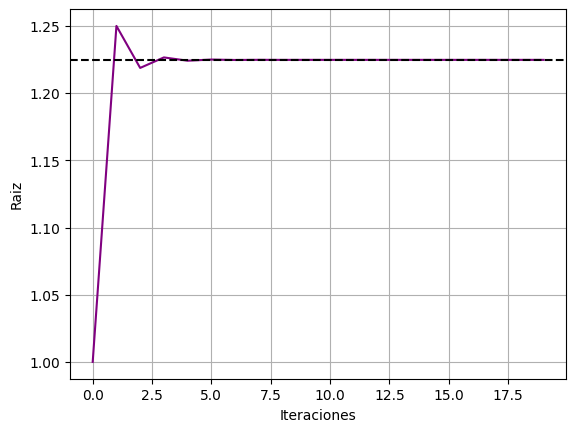

In [ ]:
raiz_r=math.sqrt(1+1/2)
plt.plot(Valores_raiz, color = "purple")
plt.axhline(y=raiz_r,color="black", ls = "--")
plt.xlabel("Iteraciones")
plt.ylabel("Raiz")
plt.grid()
plt.show()

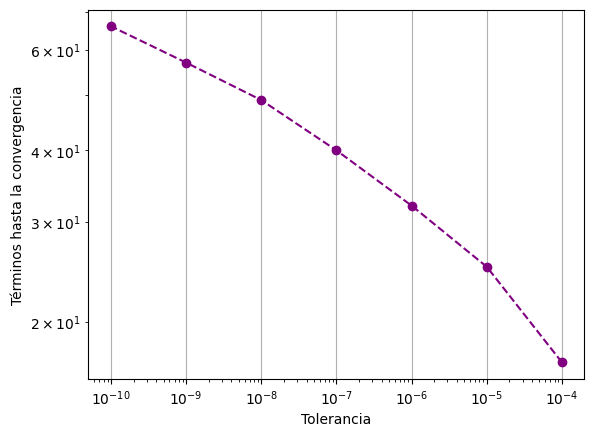

In [ ]:
Tolerancias = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]  # Lista de diferentes tolerancias para probar la convergencia
Iteraciones_nec = []  # Lista vacía para almacenar el número de iteraciones necesarias para cada tolerancia

for tols in Tolerancias:   # Para cada tolerancia en la lista:
    Suma_m, Valores_m, Iteraciones_m = raiz(x, tol=tols)  # Calcula la raíz con la tolerancia actual
    Iteraciones_nec.append(Iteraciones_m)  # Guarda el número de iteraciones usadas en la lista

plt.loglog(Tolerancias, Iteraciones_nec, color='purple', marker ="o", ls ="--")
plt.xlabel('Tolerancia')
plt.ylabel('Términos hasta la convergencia')
plt.grid()
plt.show()